In [1]:
#install the dependencies and load the necessary headers
import pybullet as p
import pybullet_data
import time

In [2]:
# add GUI when you wanted to see the output,
# when you want to run a hundered simulations at once then go for direct

physicsClient = p.connect(p.GUI)
p.setAdditionalSearchPath(pybullet_data.getDataPath()) #optionally


# set gravity downward(so negative z direction)
p.setGravity(0,0,-10)

#load the ground plane
planeId = p.loadURDF("plane.urdf")

In [3]:
#place the robot at the base position
startPos = [0,0,0]
startOrientation = p.getQuaternionFromEuler([0,0,0])

#load the robot urdf file
boxId = p.loadURDF("ur5.urdf",startPos, startOrientation)

In [4]:
#set the center of mass frame (loadURDF sets base link frame) startPos/Ornp.resetBasePositionAndOrientation(boxId, startPos, startOrientation)
for i in range (10000):
    p.stepSimulation()
    time.sleep(1./240.)
    
#get disconnected
# p.disconnect()

creating animated png, please about 5 seconds
CPU times: user 7.75 s, sys: 1.23 s, total: 8.98 s
Wall time: 3 s
CPU times: user 3.04 ms, sys: 2.6 ms, total: 5.63 ms
Wall time: 392 µs


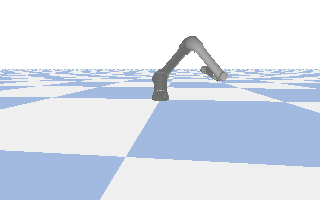

In [5]:
from numpngw import write_apng
from IPython.display import Image
import numpy as np


yaw = 0
camTargetPos = [0, 0, 0]
cameraUp = [0, 0, 1]
cameraPos = [1, 1, 1]
p.setGravity(0, 0, -10)

frames=[] #frames to create animated png
for r in range(60):
    yaw += 6
    pitch = -10.0
    roll = 0
    upAxisIndex = 2
    camDistance = 1.5
    pixelWidth = 320
    pixelHeight = 200
    nearPlane = 0.01
    farPlane = 100
    fov = 60
    viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                                roll, upAxisIndex)
    aspect = pixelWidth / pixelHeight
    projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)
        
    img_arr = p.getCameraImage(pixelWidth,pixelHeight,viewMatrix,projectionMatrix)
    w = img_arr[0]  #width of the image, in pixels
    h = img_arr[1]  #height of the image, in pixels
    rgb = img_arr[2]  #color data RGB
    dep = img_arr[3]  #depth data
    #print("w=",w,"h=",h)
    np_img_arr = np.reshape(rgb, (h, w, 4))
    frame = np_img_arr[:, :, :3]
    frames.append(frame)
print("creating animated png, please about 5 seconds")
%time write_apng("example6.png", frames, delay=100)
%time Image(filename="example6.png")